In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames 


# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_countries = pd.read_csv("data/usable/global_energy_consumption.csv", index_col = 0)

In [7]:
df_countries.head(1)

,Entity,Code,Year,"Other renewables (TWh, substituted energy)","Biofuels (TWh, substituted energy)","Solar (TWh, substituted energy)","Wind (TWh, substituted energy)","Hydropower (TWh, substituted energy)","Nuclear (TWh, substituted energy)","Gas (TWh, substituted energy)","Oil (TWh, substituted energy)","Coal (TWh, substituted energy)","Traditional biomass (TWh, substituted energy)"
42,World,OWID_WRL,1990,361.2137,106.56911,1.148346,10.741176,6383.0127,5676.7207,19481.15,37608.0,25916.205,11111


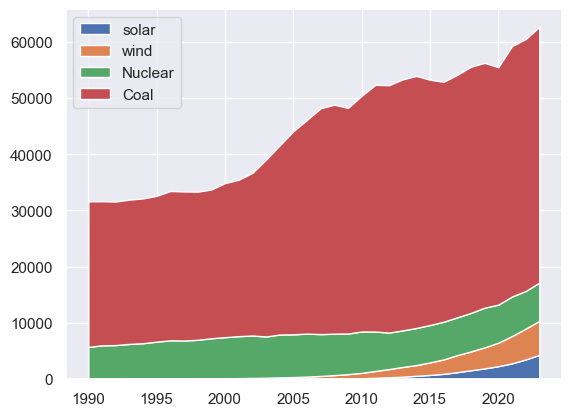

In [3]:
# set seaborn style
sns.set_theme()
 
# Data
x = df_countries['Year']
y = [df_countries['Solar (TWh, substituted energy)'], df_countries['Wind (TWh, substituted energy)'], df_countries['Nuclear (TWh, substituted energy)'], df_countries['Coal (TWh, substituted energy)']]
 
# Plot
plt.stackplot(x,y, labels=['solar','wind','Nuclear', 'Coal'])
plt.legend(loc='upper left')
plt.show()

In [5]:
df_solar_consump = pd.read_csv('data/usable/territorial_solar_consumption.csv', index_col = 0)

In [10]:
df_solar_consump.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8683 entries, 0 to 8682
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        8683 non-null   object 
 1   Code                          7227 non-null   object 
 2   Year                          8683 non-null   int64  
 3   Electricity from solar (TWh)  8683 non-null   float64
 4   Electricity from solar (GWh)  8683 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 407.0+ KB


In [6]:
df_solar_consump['Year'] = df_solar_consump['Year'].apply(lambda x: str(x))

In [12]:
df_solar_consump.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8683 entries, 0 to 8682
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        8683 non-null   object 
 1   Code                          7227 non-null   object 
 2   Year                          8683 non-null   object 
 3   Electricity from solar (TWh)  8683 non-null   float64
 4   Electricity from solar (GWh)  8683 non-null   float64
dtypes: float64(2), object(3)
memory usage: 407.0+ KB


In [13]:
df_solar_consump_europe = df_solar_consump[df_solar_consump['Entity'] == 'Europe']

In [14]:
df_solar_consump_africa = df_solar_consump[df_solar_consump['Entity'] == 'Africa']

In [15]:
df_solar_consump_usa = df_solar_consump[df_solar_consump['Entity'] == 'North America']

In [16]:
df_solar_consump_south_america = df_solar_consump[df_solar_consump['Entity'] == 'South America']

In [17]:
df_solar_consump_asia = df_solar_consump[df_solar_consump['Entity'] == 'Asia']

''

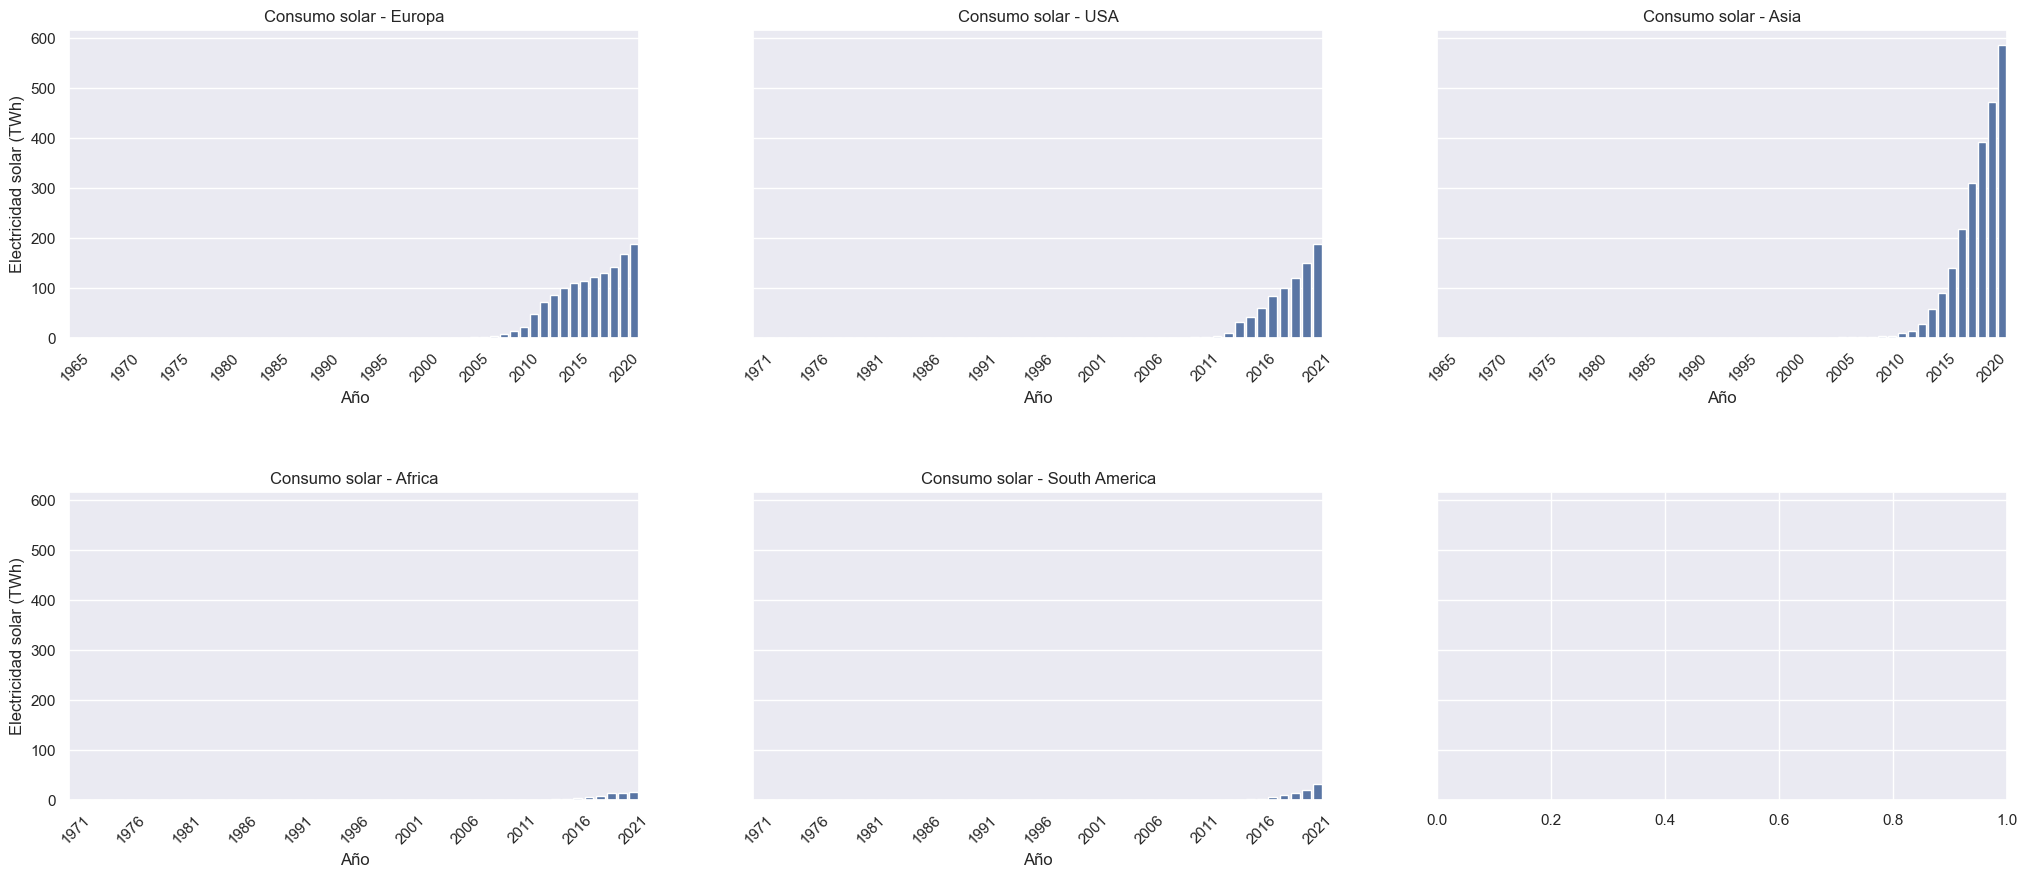

In [135]:
fig, axes = plt.subplots(2, 3, figsize=(25, 10), sharey=True)  # Compartimos eje Y para comparar mejor

# Aumentar espacio entre filas
# Podríamos subir el valor (por ejemplo 0.7 o 1.0) para más separación
plt.subplots_adjust(hspace=0.5)  

#EUROPE
sns.barplot(y = "Electricity from solar (TWh)", 
            x = "Year",
            data = df_solar_consump_europe,
            ax = axes[0,0])

# Mostrar solo ciertos años, por ejemplo, cada 3
years_europe = df_solar_consump_europe["Year"].unique()
axes[0,0].set_xticks(years_europe[::5])
axes[0,0].set_xticklabels(years_europe[::5], rotation=45)
axes[0,0].set_title("Consumo solar - Europa")
axes[0,0].set_xlabel("Año")
axes[0,0].set_ylabel("Electricidad solar (TWh)")

#USA
sns.barplot(y = "Electricity from solar (TWh)", 
            x = "Year",
            data = df_solar_consump_usa,
            ax = axes[0,1])

years_usa = df_solar_consump_usa["Year"].unique()
axes[0,1].set_xticks(years_usa[::5])
axes[0,1].set_xticklabels(years_usa[::5], rotation=45)
axes[0,1].set_title("Consumo solar - USA")
axes[0,1].set_xlabel("Año")
axes[0,1].set_ylabel("Electricidad solar (TWh)")


#ASIA
sns.barplot(y = "Electricity from solar (TWh)", 
            x = "Year",
            data = df_solar_consump_asia,
            ax = axes[0,2])

years_asia = df_solar_consump_asia["Year"].unique()
axes[0,2].set_xticks(years_asia[::5])
axes[0,2].set_xticklabels(years_asia[::5], rotation=45)
axes[0,2].set_title("Consumo solar - Asia")
axes[0,2].set_xlabel("Año")
axes[0,2].set_ylabel("Electricidad solar (TWh)")

#South_america
sns.barplot(y = "Electricity from solar (TWh)", 
            x = "Year",
            data = df_solar_consump_africa,
            ax = axes[1,0])

years_africa = df_solar_consump_africa["Year"].unique()
axes[1,0].set_xticks(years_africa[::5])
axes[1,0].set_xticklabels(years_africa[::5], rotation=45)
axes[1,0].set_title("Consumo solar - Africa")
axes[1,0].set_xlabel("Año")
axes[1,0].set_ylabel("Electricidad solar (TWh)")


#South_america
sns.barplot(y = "Electricity from solar (TWh)", 
            x = "Year",
            data = df_solar_consump_south_america,
            ax = axes[1,1])

years_south_america = df_solar_consump_south_america["Year"].unique()
axes[1,1].set_xticks(years_south_america[::5])
axes[1,1].set_xticklabels(years_south_america[::5], rotation=45)
axes[1,1].set_title("Consumo solar - South America")
axes[1,1].set_xlabel("Año")
axes[1,1].set_ylabel("Electricidad solar (TWh)")
;

In [7]:
df_generation_wind = pd.read_csv('data/usable/territorial_wind_generation.csv', index_col = 0)

In [20]:
df_generation_wind.head(1)

,Entity,Code,Year,Electricity from wind (TWh)
0,Afghanistan,AFG,2000,0.0


In [8]:
df_generation_wind['Year'] = df_generation_wind['Year'].apply(lambda x: str(x))

In [22]:
df_generation_wind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8676 entries, 0 to 8675
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Entity                       8676 non-null   object 
 1   Code                         7217 non-null   object 
 2   Year                         8676 non-null   object 
 3   Electricity from wind (TWh)  8676 non-null   float64
dtypes: float64(1), object(3)
memory usage: 338.9+ KB


In [23]:
df_generation_wind_europe = df_generation_wind[df_generation_wind['Entity'] == 'Europe']

In [24]:
df_generation_wind_africa = df_generation_wind[df_generation_wind['Entity'] == 'Africa']

In [25]:
df_generation_wind_usa = df_generation_wind[df_generation_wind['Entity'] == 'North America']

In [26]:
df_generation_wind_south_am = df_generation_wind[df_generation_wind['Entity'] == 'South America']

In [27]:
df_generation_wind_asia = df_generation_wind[df_generation_wind['Entity'] == 'Asia']

''

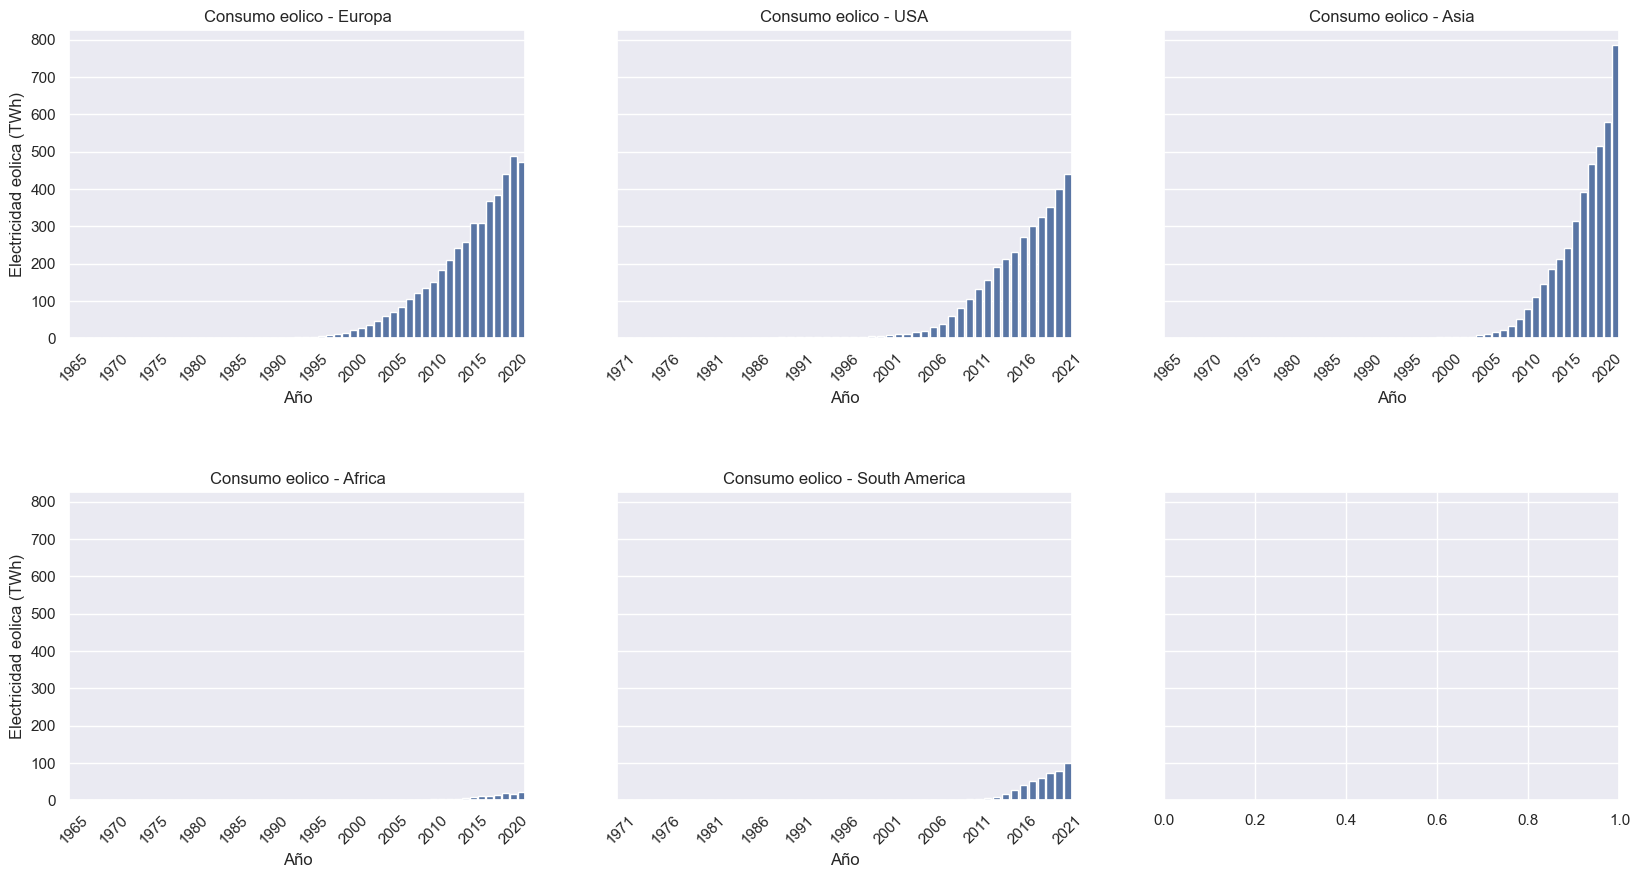

In [136]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharey=True)  # Compartimos eje Y para comparar mejor

# Aumentar espacio entre filas
plt.subplots_adjust(hspace=0.5)  

#EUROPE
sns.barplot(y = "Electricity from wind (TWh)", 
            x = "Year",
            data = df_generation_wind_europe,
            ax = axes[0,0])

# Mostrar solo ciertos años, por ejemplo, cada 3
years_europe = sorted(df_generation_wind_europe["Year"].unique())
axes[0,0].set_xticks(years_europe[::5])
axes[0,0].set_xticklabels(years_europe[::5], rotation=45)
axes[0,0].set_title("Consumo eolico - Europa")
axes[0,0].set_xlabel("Año")
axes[0,0].set_ylabel("Electricidad eolica (TWh)")

#USA
sns.barplot(y = "Electricity from wind (TWh)", 
            x = "Year",
            data = df_generation_wind_usa,
            ax = axes[0,1])

years_usa = sorted(df_generation_wind_usa["Year"].unique())
axes[0,1].set_xticks(years_usa[::5])
axes[0,1].set_xticklabels(years_usa[::5], rotation=45)
axes[0,1].set_title("Consumo eolico - USA")
axes[0,1].set_xlabel("Año")
axes[0,1].set_ylabel("Electricidad eolica (TWh)")


#ASIA
sns.barplot(y = "Electricity from wind (TWh)", 
            x = "Year",
            data = df_generation_wind_asia,
            ax = axes[0,2])

years_asia = sorted(df_generation_wind_asia["Year"].unique())
axes[0,2].set_xticks(years_asia[::5])
axes[0,2].set_xticklabels(years_asia[::5], rotation=45)
axes[0,2].set_title("Consumo eolico - Asia")
axes[0,2].set_xlabel("Año")
axes[0,2].set_ylabel("Electricidad eolica (TWh)")

#South_america
sns.barplot(y = "Electricity from wind (TWh)", 
            x = "Year",
            data = df_generation_wind_africa,
            ax = axes[1,0])

years_africa = sorted(df_generation_wind_africa["Year"].unique())
axes[1,0].set_xticks(years_africa[::5])
axes[1,0].set_xticklabels(years_africa[::5], rotation=45)
axes[1,0].set_title("Consumo eolico - Africa")
axes[1,0].set_xlabel("Año")
axes[1,0].set_ylabel("Electricidad eolica (TWh)")


#South_america
sns.barplot(y = "Electricity from wind (TWh)", 
            x = "Year",
            data = df_generation_wind_south_am,
            ax = axes[1,1])

years_south_america = sorted(df_generation_wind_south_am["Year"].unique())
axes[1,1].set_xticks(years_south_america[::5])
axes[1,1].set_xticklabels(years_south_america[::5], rotation=45)
axes[1,1].set_title("Consumo eolico - South America")
axes[1,1].set_xlabel("Año")
axes[1,1].set_ylabel("Electricidad eolica (TWh)")

;

In [9]:
df_gdp = pd.read_csv("data/usable/gross-domestic-product-pivot.csv")
df_solar_capacity = pd.read_csv("data/usable/territorial_solar_capacity.csv", index_col = 0)
df_solar_electricity = pd.read_csv("data/usable/territorial_solar_electricity.csv", index_col = 0)
df_wind_cumulative_capacity = pd.read_csv("data/usable/territorial_wind_cumulative_capacity.csv", index_col = 0)
df_wind_electricity = pd.read_csv("data/usable/territorial_wind_electricity.csv", index_col = 0)

In [ ]:
#que todos los Year sean integers:
df_gdp['Year'] = df_gdp['Year'].astype(int)
df_solar_capacity['Year'] = df_solar_capacity['Year'].astype(int)
df_generation_wind['Year'] = df_generation_wind['Year'].astype(int)
df_solar_consump['Year'] = df_solar_consump['Year'].astype(int)
df_solar_electricity['Year'] = df_solar_electricity['Year'].astype(int)
df_wind_cumulative_capacity['Year'] = df_wind_cumulative_capacity['Year'].astype(int)
df_wind_electricity['Year'] = df_wind_electricity['Year'].astype(int)

In [11]:
df_capacity = df_solar_capacity.merge(df_wind_cumulative_capacity, on = ['Entity','Year'])
df_generation_consump = df_solar_consump.merge(df_generation_wind, on = ['Entity','Year'])
df_electricity = df_solar_electricity.merge(df_wind_electricity, on = ['Entity','Year'])

In [13]:
df_electricity.sample(5) 

,Entity,Code_x,Year,Solar (% electricity),Code_y,Wind (% electricity)
621,Barbados,BRB,2004,0.000000,BRB,0.000000
400,Asia Pacific (BP),NaN,1993,0.001477,NaN,0.010685
4309,New Zealand,NZL,1990,0.000000,NZL,0.000000
1323,Colombia,COL,1992,0.000000,COL,0.000000
3282,Kiribati,KIR,2012,0.000000,KIR,0.000000


In [14]:
#Tenemos que eliminar los que tengan NaN en código, para ello, eliminamos aquellas filas cuyo código sea nulo:
df_capacity = df_capacity[df_capacity['Code_x'].notna()]
df_generation_consump = df_generation_consump[df_generation_consump['Code_x'].notna()]
df_electricity = df_electricity[df_electricity['Code_x'].notna()]


In [ ]:
df_merge1 = df_gdp.merge(df_capacity, left_on = ['Country Code','Year'], right_on = ['Code_x','Year'])
df_merge1 = df_merge1.drop(columns=['Code_x','Code_y', 'Entity'])

In [ ]:
df_merge2 = df_merge1.merge(df_generation_consump, left_on = ['Country Code','Year'], right_on = ['Code_x','Year'])
df_merge2 = df_merge2.drop(columns=['Code_x','Code_y', 'Entity'])

In [19]:
df_merge3 = df_merge2.merge(df_electricity, left_on = ['Country Code','Year'], right_on = ['Code_x','Year'])
df_merge3 = df_merge3.drop(columns=['Code_x','Code_y', 'Entity'])

In [130]:
df_merge3.to_csv('data/usable/wind-solar-gdp.csv', index=False)

In [24]:
df_merge3.columns

Index(['Country Name', 'Country Code', 'Year', 'GDP($)', 'Solar Capacity (GW)',
       'Wind Capacity (GWp)', 'Electricity from solar (TWh)',
       'Electricity from solar (GWh)', 'Electricity from wind (TWh)',
       'Solar (% electricity)', 'Wind (% electricity)'],
      dtype='object')

In [33]:
df_merge3['Country Name'].value_counts()

Country Name
Argentina             17
Australia             17
Austria               17
Belgium               17
Brazil                17
Bulgaria              17
Canada                17
Chile                 17
China                 17
Denmark               17
Egypt, Arab Rep.      17
France                17
Germany               17
Greece                17
India                 17
Italy                 17
Japan                 17
Korea, Rep.           17
Mexico                17
Morocco               17
Netherlands           17
Pakistan              17
Philippines           17
Poland                17
Portugal              17
Romania               17
South Africa          17
Spain                 17
Sweden                17
Thailand              17
Turkiye               17
United Kingdom        17
United States         17
Jordan                16
Russian Federation    16
Ukraine               16
Name: count, dtype: int64

In [26]:
df_merge3[df_merge3['Country Name'] == 'Cook Island']

,Country Name,Country Code,Year,GDP($),Solar Capacity (GW),Wind Capacity (GWp),Electricity from solar (TWh),Electricity from solar (GWh),Electricity from wind (TWh),Solar (% electricity),Wind (% electricity)


''

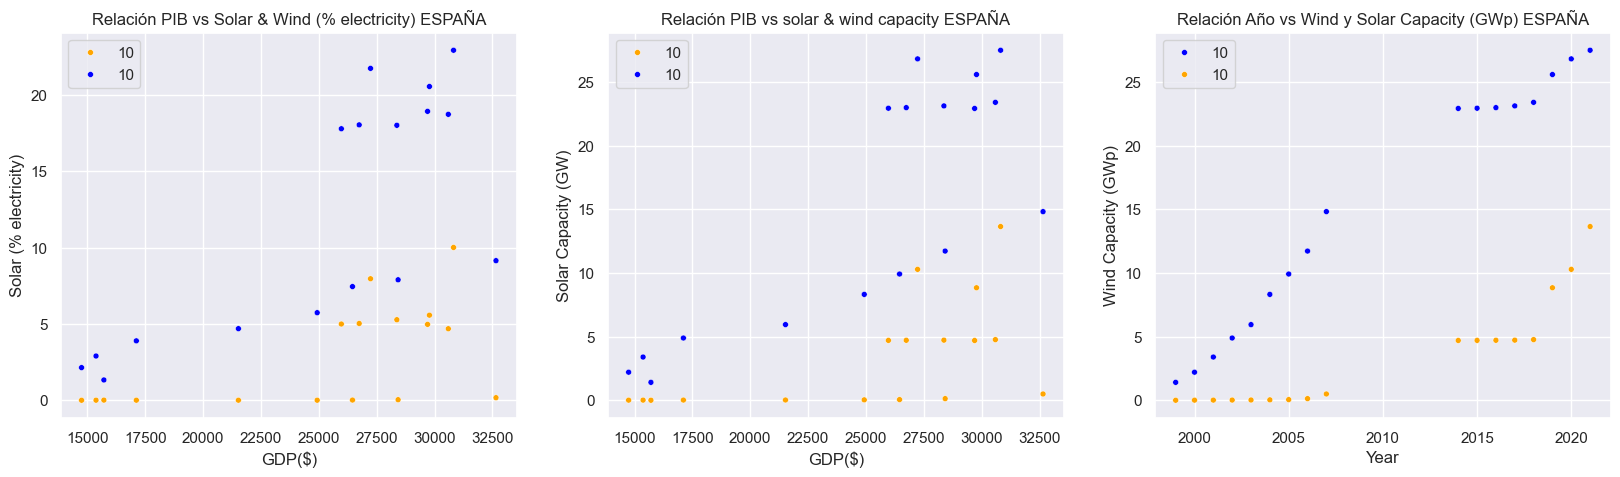

In [165]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

# Aumentar espacio entre filas
plt.subplots_adjust(hspace=0.6)  

sns.scatterplot(x = "GDP($)", 
                y = "Solar (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'Spain'], 
                size = 10, 
                color = "orange",
                ax = axes[0])

axes[0].set_title("Relación PIB vs Solar & Wind (% electricity) ESPAÑA")

sns.scatterplot(x = "GDP($)", 
                y = "Wind (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'Spain'], 
                size = 10, 
                color = "blue",
                ax = axes[0])


sns.scatterplot(x = "GDP($)", 
                y = "Solar Capacity (GW)", 
                data = df_merge3[df_merge3['Country Name'] == 'Spain'], 
                size = 10, 
                color = "orange",
                ax = axes[1])

axes[1].set_title("Relación PIB vs solar & wind capacity ESPAÑA")


sns.scatterplot(x = "GDP($)", 
                y = "Wind Capacity (GWp)", 
                data = df_merge3[df_merge3['Country Name'] == 'Spain'], 
                size = 10, 
                color = "blue",
                ax = axes[1])



sns.scatterplot(x = "Year", 
                y = "Wind Capacity (GWp)",
                data = df_merge3[df_merge3['Country Name'] == 'Spain'], 
                size = 10, 
                color = "blue",
                ax = axes[2])

axes[2].set_title("Relación Año vs Wind y Solar Capacity (GWp) ESPAÑA")

sns.scatterplot(x = "Year", 
                y = "Solar Capacity (GW)",
                data = df_merge3[df_merge3['Country Name'] == 'Spain'], 
                size = 10, 
                color = "orange",
                ax = axes[2])



;

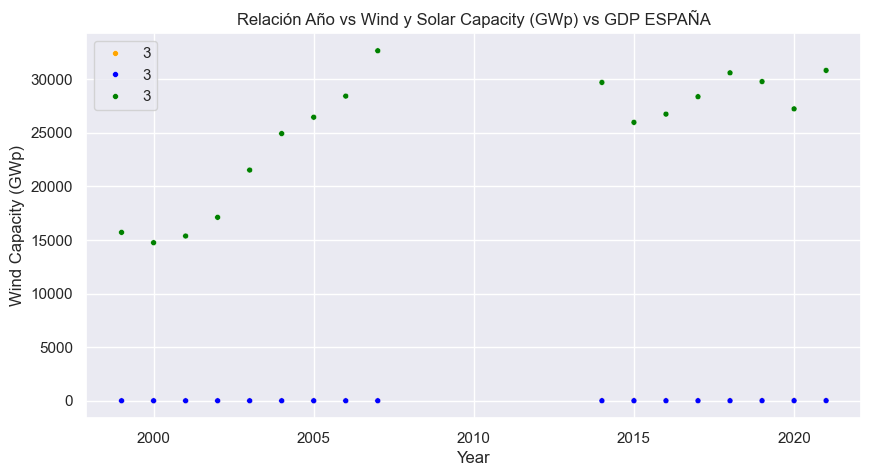

In [166]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))

sns.scatterplot(x = "Year", 
                y = "Wind Capacity (GWp)",
                data = df_merge3[df_merge3['Country Name'] == 'Spain'], 
                size = 3, 
                color = "orange",
                ax = axes)

axes.set_title("Relación Año vs Wind y Solar Capacity (GWp) vs GDP ESPAÑA")

sns.scatterplot(x = "Year", 
                y = "Solar Capacity (GW)",
                data = df_merge3[df_merge3['Country Name'] == 'Spain'], 
                size = 3, 
                color = "blue",
                ax = axes)


sns.scatterplot(x = "Year", 
                y = "GDP($)",
                data = df_merge3[df_merge3['Country Name'] == 'Spain'], 
                size = 3, 
                color = "green",
                ax = axes);

''

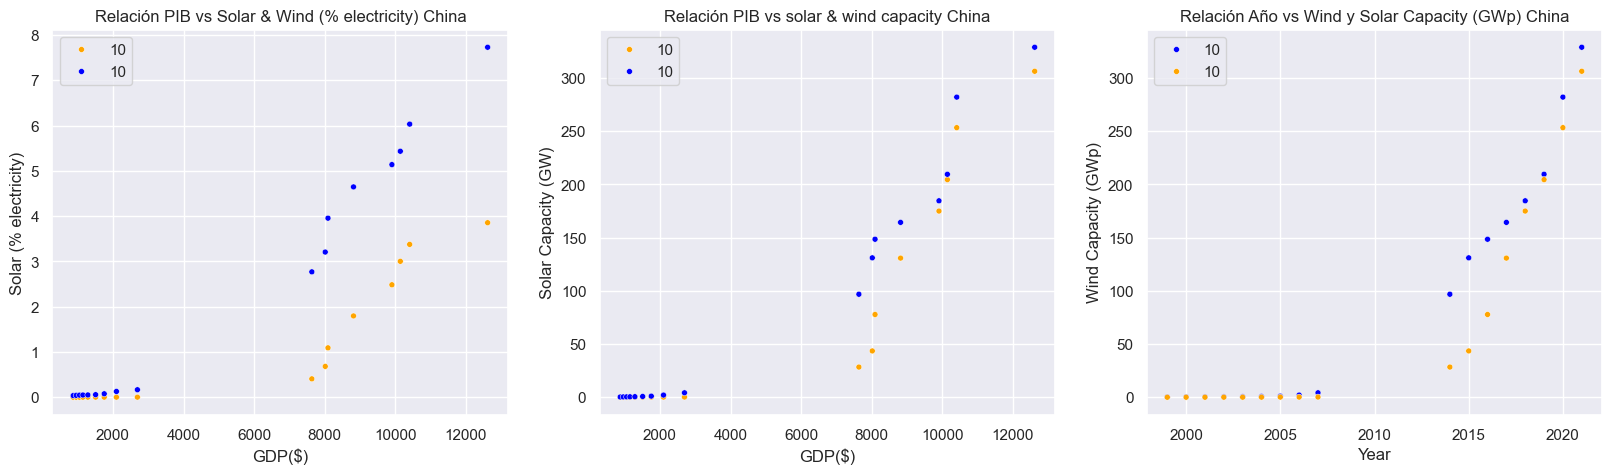

In [167]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

# Aumentar espacio entre filas
plt.subplots_adjust(hspace=0.6)  

sns.scatterplot(x = "GDP($)", 
                y = "Solar (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'China'], 
                size = 10, 
                color = "orange",
                ax = axes[0])

axes[0].set_title("Relación PIB vs Solar & Wind (% electricity) China")

sns.scatterplot(x = "GDP($)", 
                y = "Wind (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'China'], 
                size = 10, 
                color = "blue",
                ax = axes[0])


sns.scatterplot(x = "GDP($)", 
                y = "Solar Capacity (GW)", 
                data = df_merge3[df_merge3['Country Name'] == 'China'], 
                size = 10, 
                color = "orange",
                ax = axes[1])

axes[1].set_title("Relación PIB vs solar & wind capacity China")


sns.scatterplot(x = "GDP($)", 
                y = "Wind Capacity (GWp)", 
                data = df_merge3[df_merge3['Country Name'] == 'China'], 
                size = 10, 
                color = "blue",
                ax = axes[1])



sns.scatterplot(x = "Year", 
                y = "Wind Capacity (GWp)",
                data = df_merge3[df_merge3['Country Name'] == 'China'], 
                size = 10, 
                color = "blue",
                ax = axes[2])

axes[2].set_title("Relación Año vs Wind y Solar Capacity (GWp) China")

sns.scatterplot(x = "Year", 
                y = "Solar Capacity (GW)",
                data = df_merge3[df_merge3['Country Name'] == 'China'], 
                size = 10, 
                color = "orange",
                ax = axes[2])



;

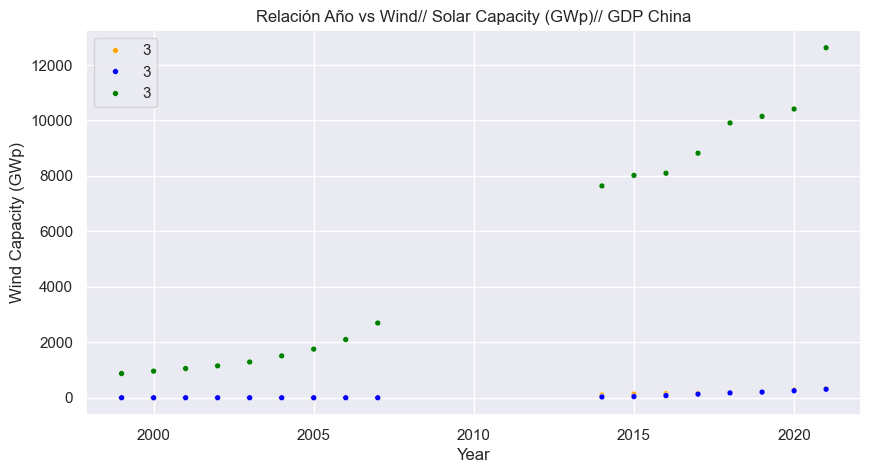

In [170]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))

sns.scatterplot(x = "Year", 
                y = "Wind Capacity (GWp)",
                data = df_merge3[df_merge3['Country Name'] == 'China'], 
                size = 3, 
                color = "orange",
                ax = axes)

axes.set_title("Relación Año vs Wind// Solar Capacity (GWp)// GDP China")

sns.scatterplot(x = "Year", 
                y = "Solar Capacity (GW)",
                data = df_merge3[df_merge3['Country Name'] == 'China'], 
                size = 3, 
                color = "blue",
                ax = axes)


sns.scatterplot(x = "Year", 
                y = "GDP($)",
                data = df_merge3[df_merge3['Country Name'] == 'China'], 
                size = 3, 
                color = "green",
                ax = axes);

''

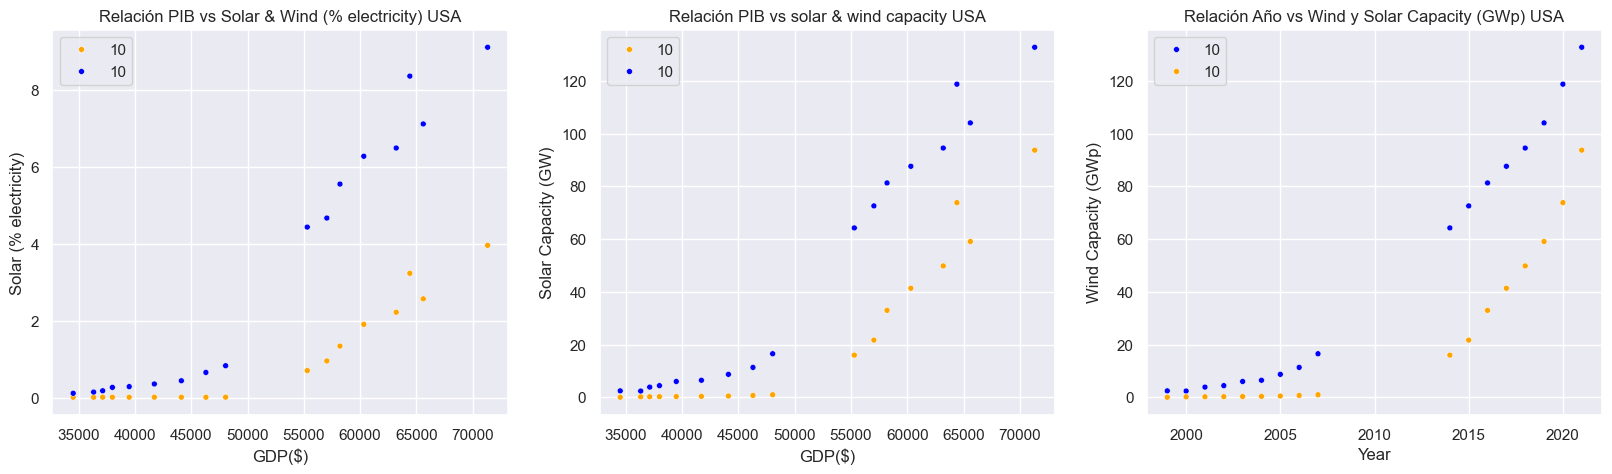

In [39]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

# Aumentar espacio entre filas
plt.subplots_adjust(hspace=0.6)  

sns.scatterplot(x = "GDP($)", 
                y = "Solar (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'United States'], 
                size = 10, 
                color = "orange",
                ax = axes[0])

axes[0].set_title("Relación PIB vs Solar & Wind (% electricity) USA")

sns.scatterplot(x = "GDP($)", 
                y = "Wind (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'United States'], 
                size = 10, 
                color = "blue",
                ax = axes[0])


sns.scatterplot(x = "GDP($)", 
                y = "Solar Capacity (GW)", 
                data = df_merge3[df_merge3['Country Name'] == 'United States'], 
                size = 10, 
                color = "orange",
                ax = axes[1])

axes[1].set_title("Relación PIB vs solar & wind capacity USA")


sns.scatterplot(x = "GDP($)", 
                y = "Wind Capacity (GWp)", 
                data = df_merge3[df_merge3['Country Name'] == 'United States'], 
                size = 10, 
                color = "blue",
                ax = axes[1])



sns.scatterplot(x = "Year", 
                y = "Wind Capacity (GWp)",
                data = df_merge3[df_merge3['Country Name'] == 'United States'], 
                size = 10, 
                color = "blue",
                ax = axes[2])

axes[2].set_title("Relación Año vs Wind y Solar Capacity (GWp) USA")

sns.scatterplot(x = "Year", 
                y = "Solar Capacity (GW)",
                data = df_merge3[df_merge3['Country Name'] == 'United States'], 
                size = 10, 
                color = "orange",
                ax = axes[2])
;

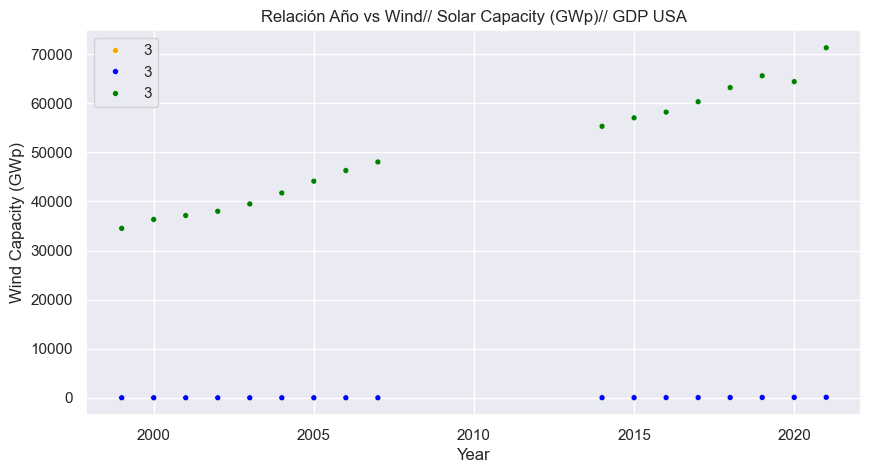

In [40]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))

sns.scatterplot(x = "Year", 
                y = "Wind Capacity (GWp)",
                data = df_merge3[df_merge3['Country Name'] == 'United States'], 
                size = 3, 
                color = "orange",
                ax = axes)

axes.set_title("Relación Año vs Wind// Solar Capacity (GWp)// GDP USA")

sns.scatterplot(x = "Year", 
                y = "Solar Capacity (GW)",
                data = df_merge3[df_merge3['Country Name'] == 'United States'], 
                size = 3, 
                color = "blue",
                ax = axes)


sns.scatterplot(x = "Year", 
                y = "GDP($)",
                data = df_merge3[df_merge3['Country Name'] == 'United States'], 
                size = 3, 
                color = "green",
                ax = axes);

''

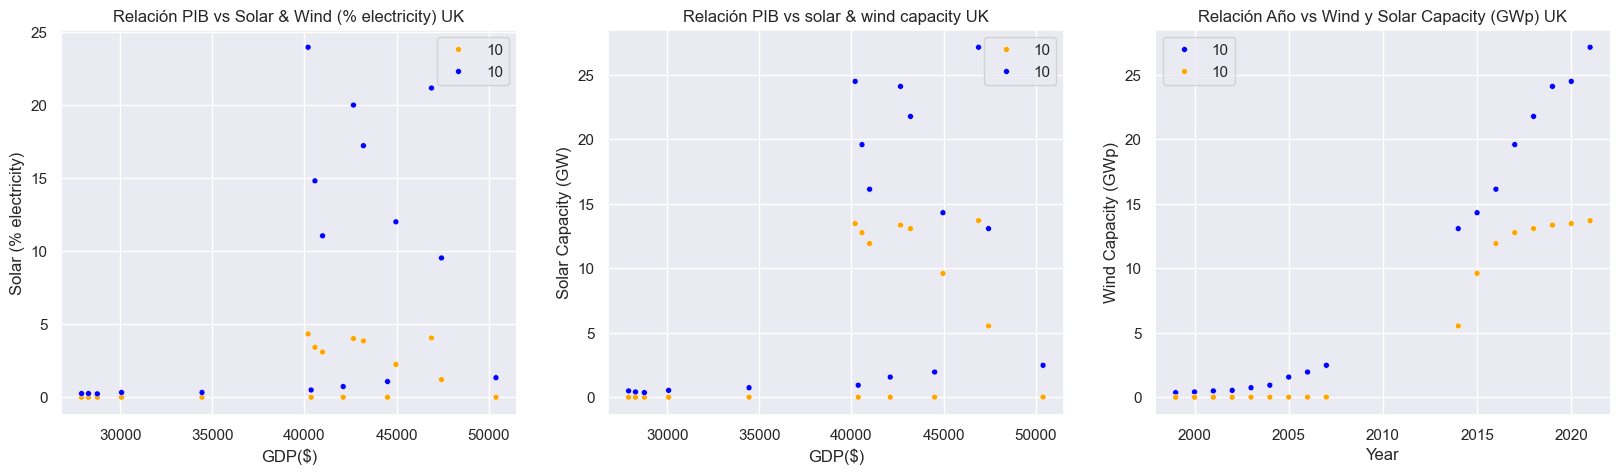

In [42]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

# Aumentar espacio entre filas
plt.subplots_adjust(hspace=0.6)  

sns.scatterplot(x = "GDP($)", 
                y = "Solar (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'United Kingdom'], 
                size = 10, 
                color = "orange",
                ax = axes[0])

axes[0].set_title("Relación PIB vs Solar & Wind (% electricity) UK")

sns.scatterplot(x = "GDP($)", 
                y = "Wind (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'United Kingdom'], 
                size = 10, 
                color = "blue",
                ax = axes[0])


sns.scatterplot(x = "GDP($)", 
                y = "Solar Capacity (GW)", 
                data = df_merge3[df_merge3['Country Name'] == 'United Kingdom'], 
                size = 10, 
                color = "orange",
                ax = axes[1])

axes[1].set_title("Relación PIB vs solar & wind capacity UK")


sns.scatterplot(x = "GDP($)", 
                y = "Wind Capacity (GWp)", 
                data = df_merge3[df_merge3['Country Name'] == 'United Kingdom'], 
                size = 10, 
                color = "blue",
                ax = axes[1])



sns.scatterplot(x = "Year", 
                y = "Wind Capacity (GWp)",
                data = df_merge3[df_merge3['Country Name'] == 'United Kingdom'], 
                size = 10, 
                color = "blue",
                ax = axes[2])

axes[2].set_title("Relación Año vs Wind y Solar Capacity (GWp) UK")

sns.scatterplot(x = "Year", 
                y = "Solar Capacity (GW)",
                data = df_merge3[df_merge3['Country Name'] == 'United Kingdom'], 
                size = 10, 
                color = "orange",
                ax = axes[2])
;

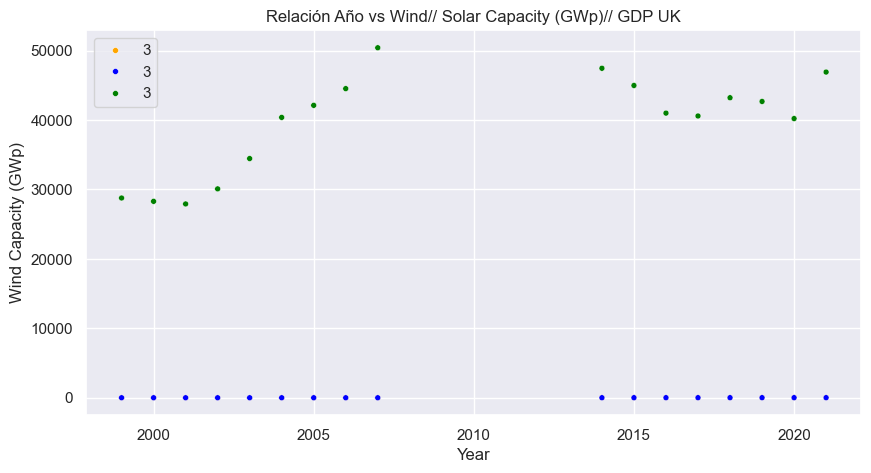

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))

sns.scatterplot(x = "Year", 
                y = "Wind Capacity (GWp)",
                data = df_merge3[df_merge3['Country Name'] == 'United Kingdom'], 
                size = 3, 
                color = "orange",
                ax = axes)

axes.set_title("Relación Año vs Wind// Solar Capacity (GWp)// GDP USA")

sns.scatterplot(x = "Year", 
                y = "Solar Capacity (GW)",
                data = df_merge3[df_merge3['Country Name'] == 'United Kingdom'], 
                size = 3, 
                color = "blue",
                ax = axes)


sns.scatterplot(x = "Year", 
                y = "GDP($)",
                data = df_merge3[df_merge3['Country Name'] == 'United Kingdom'], 
                size = 3, 
                color = "green",
                ax = axes);

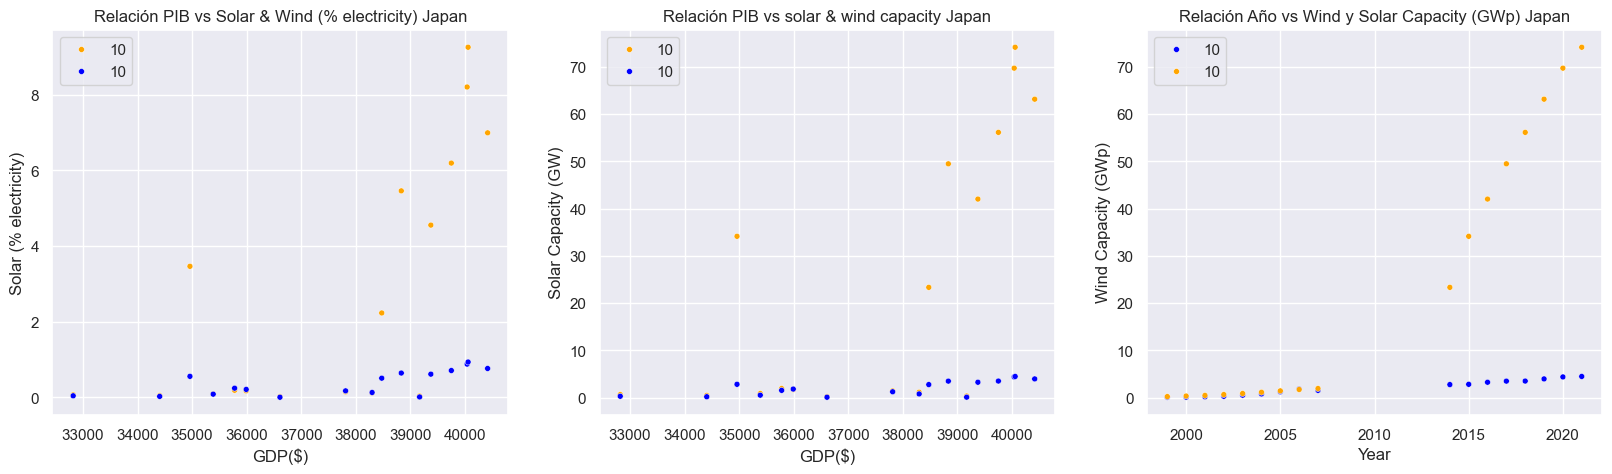

In [45]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

# Aumentar espacio entre filas
plt.subplots_adjust(hspace=0.6)  

sns.scatterplot(x = "GDP($)", 
                y = "Solar (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'Japan'], 
                size = 10, 
                color = "orange",
                ax = axes[0])

axes[0].set_title("Relación PIB vs Solar & Wind (% electricity) Japan")

sns.scatterplot(x = "GDP($)", 
                y = "Wind (% electricity)", 
                data = df_merge3[df_merge3['Country Name'] == 'Japan'], 
                size = 10, 
                color = "blue",
                ax = axes[0])


sns.scatterplot(x = "GDP($)", 
                y = "Solar Capacity (GW)", 
                data = df_merge3[df_merge3['Country Name'] == 'Japan'], 
                size = 10, 
                color = "orange",
                ax = axes[1])

axes[1].set_title("Relación PIB vs solar & wind capacity Japan")


sns.scatterplot(x = "GDP($)", 
                y = "Wind Capacity (GWp)", 
                data = df_merge3[df_merge3['Country Name'] == 'Japan'], 
                size = 10, 
                color = "blue",
                ax = axes[1])



sns.scatterplot(x = "Year", 
                y = "Wind Capacity (GWp)",
                data = df_merge3[df_merge3['Country Name'] == 'Japan'], 
                size = 10, 
                color = "blue",
                ax = axes[2])

axes[2].set_title("Relación Año vs Wind y Solar Capacity (GWp) Japan")

sns.scatterplot(x = "Year", 
                y = "Solar Capacity (GW)",
                data = df_merge3[df_merge3['Country Name'] == 'Japan'], 
                size = 10, 
                color = "orange",
                ax = axes[2]);

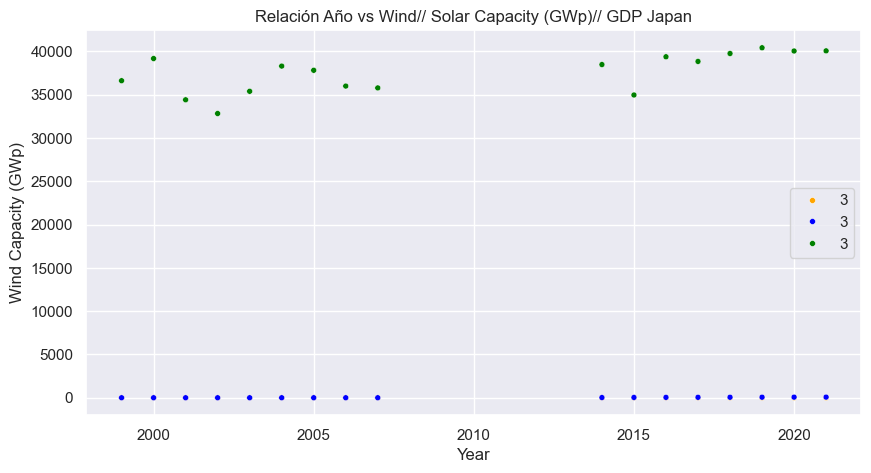

In [44]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))

sns.scatterplot(x = "Year", 
                y = "Wind Capacity (GWp)",
                data = df_merge3[df_merge3['Country Name'] == 'Japan'], 
                size = 3, 
                color = "orange",
                ax = axes)

axes.set_title("Relación Año vs Wind// Solar Capacity (GWp)// GDP Japan")

sns.scatterplot(x = "Year", 
                y = "Solar Capacity (GW)",
                data = df_merge3[df_merge3['Country Name'] == 'Japan'], 
                size = 3, 
                color = "blue",
                ax = axes)


sns.scatterplot(x = "Year", 
                y = "GDP($)",
                data = df_merge3[df_merge3['Country Name'] == 'Japan'], 
                size = 3, 
                color = "green",
                ax = axes);

In [92]:
#países con GDP más alto en 2021
df_gdp[df_gdp['Year'] == 2021].sort_values('GDP($)', ascending = False).head(20)

,Country Name,Country Code,Year,GDP($),GDP($)_scale
4936,Monaco,MCO,2021,223823.363960,high
4920,Liechtenstein,LIE,2021,196783.729415,high
4922,Luxembourg,LUX,2021,133711.794436,med-high
4827,Bermuda,BMU,2021,112712.025121,med-low
4899,Ireland,IRL,2021,105561.137469,med-low
4900,Isle of Man,IMN,2021,94299.969349,med-low
4994,Switzerland,CHE,2021,93446.434452,med-low
4953,Norway,NOR,2021,93072.892512,med-low
4842,Cayman Islands,CYM,2021,86438.445257,med-low
4977,Singapore,SGP,2021,79601.412962,med-low


In [93]:
#países con GDP más alto en 2020
df_gdp[df_gdp['Year'] == 2020].sort_values('GDP($)', ascending = False).head(15)

,Country Name,Country Code,Year,GDP($),GDP($)_scale
4669,Monaco,MCO,2020,176891.886538,med-high
4653,Liechtenstein,LIE,2020,164671.093553,med-high
4655,Luxembourg,LUX,2020,116905.370397,med-low
4560,Bermuda,BMU,2020,106973.175732,med-low
4632,Ireland,IRL,2020,87567.114897,med-low
4727,Switzerland,CHE,2020,85897.784334,med-low
4575,Cayman Islands,CYM,2020,82338.798285,med-low
4633,Isle of Man,IMN,2020,79513.533035,med-low
4686,Norway,NOR,2020,68340.018103,med-low
4745,United States,USA,2020,64411.373178,med-low


In [94]:
#países con GDP más alto en 2018
df_gdp[df_gdp['Year'] == 2018].sort_values('GDP($)', ascending = False).head(15)

,Country Name,Country Code,Year,GDP($),GDP($)_scale
4135,Monaco,MCO,2018,188298.315668,med-high
4119,Liechtenstein,LIE,2018,174988.775083,med-high
4121,Luxembourg,LUX,2018,116786.511655,med-low
4026,Bermuda,BMU,2018,113204.822108,med-low
4099,Isle of Man,IMN,2018,89393.824425,med-low
4193,Switzerland,CHE,2018,85217.369151,med-low
4041,Cayman Islands,CYM,2018,83865.553157,med-low
4122,"Macao SAR, China",MAC,2018,83761.817180,med-low
4152,Norway,NOR,2018,82792.842711,med-low
4098,Ireland,IRL,2018,81248.313539,med-low
